In [23]:
import pickle
import os
import osmnx as ox
import networkx as nx
import pandas as pd
import osmnx as ox
import networkx as nx
import geohash as geohash
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import staticmaps

In [24]:
ox.settings.log_console=True
ox.settings.use_cache=True

In [25]:
# graph = ox.graph_from_place('Beijing,China', network_type = 'all')
# ox.plot_graph(graph,node_size=0, edge_linewidth=0.5)

In [26]:
allfiles=os.listdir('filtered_4749_traj/fil_traj_less_than_700_car')
len(allfiles)

1025

In [36]:
user_name=[]
latitude=[]
longitude=[]
date_time=[]
altitude_feet=[]
vehicle_type=[]
file_name=[]
# for i in range(1):
for i in range(len(allfiles)):
    with open('filtered_4749_traj/fil_traj_less_than_700_car/'+allfiles[i], 'rb') as f:
        data = pickle.load(f)
        files_name=allfiles[i].split('_')
        name=allfiles[i].replace('.pkl','')
#         print(name)
        user_name.append(files_name[0])
        vehicle_type.append(files_name[1])
        file_name.append(name)
        latitude.append(list(data['latitude']))
        longitude.append(list(data['longitude']))
        date_time.append(list(data['date_time']))
        altitude_feet.append(list(data['altitude_feet']))



    

In [37]:
df = pd.DataFrame(list(zip(user_name, latitude,longitude,date_time,altitude_feet,vehicle_type,file_name)),
               columns =['user_name', 'latitude','longitude','date_time','altitude_feet','vehicle_type','file_name'])

In [38]:
# df.to_csv('filtered_4749_traj/fil_traj_less_than_700_car.csv', encoding='utf-8', index=False)

In [39]:
df

,user_name,latitude,longitude,date_time,altitude_feet,vehicle_type,file_name
0,010,"[41.741415, 41.737063, 41.734105, 41.73911, 41...","[86.186028, 86.17947, 86.172823, 86.166563, 86...","[2008-03-31 16:00:08, 2008-03-31 16:01:07, 200...","[-777, -777, -777, -777, -777, -777, -777, -77...",taxi,010_taxi_1
1,010,"[39.121228, 39.121266, 39.121305, 39.121348, 3...","[117.238374, 117.238406, 117.238436, 117.23842...","[2008-06-17 12:30:29, 2008-06-17 12:30:31, 200...","[30, 30, 30, 30, 30, 30, 30, 30, 30, 26, 23, 2...",taxi,010_taxi_10
2,010,"[39.137166, 39.137196, 39.137223, 39.137253, 3...","[117.213876, 117.213856, 117.213828, 117.21379...","[2008-06-18 00:40:07, 2008-06-18 00:40:08, 200...","[7, 7, 7, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",taxi,010_taxi_11
3,010,"[39.121166, 39.121196, 39.121218, 39.121241, 3...","[117.23838, 117.238393, 117.23841, 117.238434,...","[2008-06-20 13:02:01, 2008-06-20 13:02:03, 200...","[-10, -10, -7, -7, -7, -7, -3, -3, -3, 0, 0, 0...",taxi,010_taxi_12
4,010,"[39.086416, 39.086431, 39.086435, 39.086445, 3...","[117.183549, 117.183521, 117.183501, 117.18347...","[2008-06-28 12:31:55, 2008-06-28 12:31:57, 200...","[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, -3, -3, ...",taxi,010_taxi_14
...,...,...,...,...,...,...,...
1020,167,"[39.952634, 39.95275, 39.952869, 39.952988, 39...","[116.31792, 116.317902, 116.317889, 116.317868...","[2008-05-05 05:33:20, 2008-05-05 05:33:21, 200...","[195, 197, 200, 203, 207, 210, 213, 217, 220, ...",taxi,167_taxi_9
1021,174,"[40.4577, 40.4570333333333, 40.4566, 40.456116...","[115.9686, 115.9692, 115.969533333333, 115.969...","[2008-03-30 08:20:56, 2008-03-30 08:21:09, 200...","[127.952755905512, 127.952755905512, 127.95275...",car,174_car_1
1022,174,"[40.3048333333333, 40.30395, 40.3002166666667,...","[116.010183333333, 116.0102, 116.011483333333,...","[2008-03-30 08:45:52, 2008-03-30 08:45:55, 200...","[1538.71391076115, 1538.71391076115, 1420.6036...",car,174_car_2
1023,175,"[39.9751166666667, 39.9751, 39.9753, 39.97505,...","[116.3306, 116.329833333333, 116.32825, 116.31...","[2007-10-19 05:23:15, 2007-10-19 05:24:15, 200...","[482.283464566929, 482.283464566929, 157.48031...",taxi,175_taxi_1


In [10]:
# max_latitude=0
# min_latitude=1000000
# max_longitude=0
# min_longitude=1000000
# for i in range(len(latitude)):
#     for j in range(len(latitude[i])):
#         if(latitude[i][j]<min_latitude):
#             min_latitude=latitude[i][j]
#         if(latitude[i][j]>max_latitude):
#             max_latitude=latitude[i][j]
#         if(longitude[i][j]<min_longitude):
#             min_longitude=longitude[i][j]
#         if(longitude[i][j]>max_longitude):
#             max_longitude=longitude[i][j]


In [9]:
# print(max_latitude)
# print(min_latitude)
# print("**************************")
# print(max_longitude)
# print(min_longitude)

In [40]:
# max_latitude1=41.853
# min_latitude1=38.199
# max_longitude1=121.097
# min_longitude1=113.643

# max_latitude1=43.660
# min_latitude1=36.359
# max_longitude1=123.125
# min_longitude1=108.217
max_latitude1=41.005
min_latitude1=38.950
max_longitude1=117.125
min_longitude1=115.217

In [52]:
# counter=0
# for i in range(df.shape[0]):
# #     for j in range(len(df['longitude'][i])):
# #         print(df['longitude'][i][j])
#     if((max(df['latitude'][i])<=max_latitude1) and (min(df['latitude'][i])>= min_latitude1) and (max(df['longitude'][i])<= max_longitude1) and (min(df['longitude'][i])>= min_longitude1)):
#         counter=counter+1
# print(counter)

866


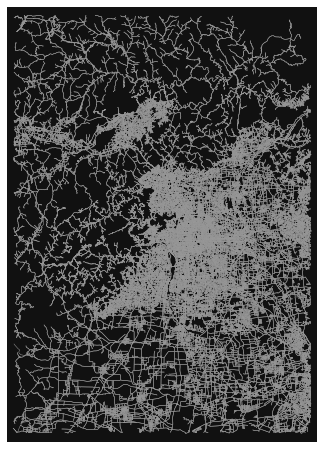

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [42]:
porto_graph=ox.graph_from_bbox(max_latitude1,min_latitude1,max_longitude1,min_longitude1,network_type = 'drive')
ox.plot_graph(porto_graph,node_size=0, edge_linewidth=0.5)

In [7]:
# for i in range(1):
#     i=4
#     if((max(df['latitude'][i])<=max_latitude1) and (min(df['latitude'][i])>= min_latitude1) and (max(df['longitude'][i])<= max_longitude1) and (min(df['longitude'][i])>= min_longitude1)):
#         for j in range(len(df['latitude'][i])):
#             org = ox.nearest_nodes(porto_graph,df['longitude'][i][j],df['latitude'][i][j])
#             print(org)

In [45]:
def image_generation(range_start,range_stop,limit,sublimit,xs,ys): 
    context = staticmaps.Context()
    context.set_zoom(14)
    context.set_tile_provider(staticmaps.tile_provider_ArcGISWorldImagery)
    all_routes=[]
    for i in range(range_start,range_stop,1):
        org = ox.nearest_nodes(porto_graph,xs[i],ys[i])
        all_routes.append(org)
    line=[]
    unique_set = set(all_routes)
    if(len(unique_set))>1:
        for i in range(len(all_routes)):
            temp=staticmaps.create_latlng(porto_graph.nodes[all_routes[i]]['y'], porto_graph.nodes[all_routes[i]]['x'])
            line.append(temp)
        context.add_object(staticmaps.Line(line,width=4))
        start = staticmaps.create_latlng(porto_graph.nodes[all_routes[0]]['y'], porto_graph.nodes[all_routes[0]]['x'])
        start_marker = staticmaps.ImageMarker(start, "start16.png", origin_x=10, origin_y=15)
        context.add_object(start_marker)
        end = staticmaps.create_latlng(porto_graph.nodes[all_routes[-1]]['y'], porto_graph.nodes[all_routes[-1]]['x'])
        end_marker = staticmaps.ImageMarker(end, "endblue16.png", origin_x=10, origin_y=15)
        context.add_object(end_marker)
        image = context.render_cairo(512, 512)
        
        image.write_to_png("staticmap/geolife/"+str(limit)+"_"+str(sublimit)+"_staticMap_original.png")
        return True
    else:
        return False 

In [50]:
count=0
limit=0
increment_value=80
for i in range(df.shape[0]):
# for i in range(10):
    if((max(df['latitude'][i])<=max_latitude1) and (min(df['latitude'][i])>= min_latitude1) and (max(df['longitude'][i])<= max_longitude1) and (min(df['longitude'][i])>= min_longitude1)):
        limit=limit+1
        if(limit>5000):
            print("Raw no: "+str(count))
            break
        image_parameter=0
        next_image_parameter=0
        sublimit=1
        while(next_image_parameter<len(df['latitude'][i])):
            next_image_parameter=image_parameter+increment_value
            if(next_image_parameter>len(df['latitude'][i])):
                next_image_parameter=len(df['latitude'][i]) 
            if(((next_image_parameter+increment_value)-next_image_parameter)<80):
                next_image_parameter=len(df['latitude'][i])
            if((next_image_parameter-image_parameter)>4):
                flag=image_generation(image_parameter,next_image_parameter,df['file_name'][i],sublimit,df['longitude'][i],df['latitude'][i])
            image_parameter=next_image_parameter-1
            if(flag):
                sublimit=sublimit+1
                    
                    


    
    

In [51]:
# df['latitude']
df.shape[0]

1025

In [6]:
# def calculate_median(test_list):
#     test_list.sort()
#     mid = len(test_list) // 2
#     res = (test_list[mid] + test_list[~mid]) / 2
#     return res

In [5]:
# calculate_median(length_trajectory)

In [2]:
# with open('GeoparseDataset/'+allfiles[5], 'rb') as f:
#     # The protocol version used is detected automatically, so we do not
#     # have to specify it.
#     data = pickle.load(f)
# print(data)
# print(allfiles[1])

In [3]:
# data['latitude'][0]

In [4]:
# len(data)

In [1]:
# for i in range(len(data)):
#     print(data['latitude'][i])
#     print(data['longitude'][i])
#     org = ox.nearest_nodes(graph,data['longitude'][i],data['latitude'][i])
#     print(org)
#     print(graph.nodes[org])